In [36]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Unsupervised Learning Techniques

Although most ML applications are based on supervised learning, the vast majority of data is unlabeled. We have the input features X, but we do not have the labels Y. The cost and effort required for humans to manually go through data and label it usually results in small datasets thus poor performance. 

Unsupervised learning addresses this by exploiting unlabeled data without needing humans to label it.

Unsupervised Learning Techniques :

    Clustering: Group similar instances together into clusters. Used for customer segmentation, recommender systems, search engines, semi-supervised learning, dimensionalit reduction and more.

    Anomaly/Outlier Detection: Objective is to learn what normal data looks like, and then use it to detect abnormal instances. Such instances are called anomalies or outliers, while normal instances are inliers. Used for fraud detection, defective product detection, identifying new trends in time series data, and removing outliers before training another model.

    Density estimation: Task of estimating the probability density function (PDF) of the random process that generated the dataset. Density estimatin is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. Also useful for data analysis and visualization.

Discriminative vs Generative Models:

    Generative: How likely is the data from the world model. We have a distribution over the whole state space of the model, we try to model the joint probability distribution.

    Discriminative: Modelling the decision boundary between classes. Focus on distinguishing classes rather than modelling the data distribution.

## Clustering

### K-means

In [30]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.metrics import silhouette_score

/var/folders/30/6x4xwhlx65q539cppr85k0h00000gn/T/ipykernel_25396/3840818300.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolors = 'k')


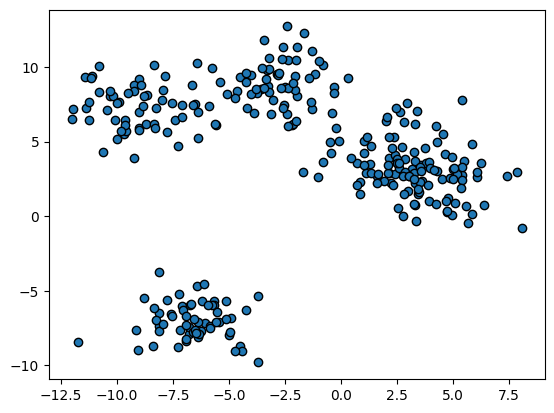

In [13]:
#creating random dataset with 100 samples and 5 centres
X, y = make_blobs(n_samples = 300, centers = 5, random_state = 42, cluster_std = 1.5)

plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolors = 'k')


In [19]:
#Clustering using kmeans
k = 5
kmeans = KMeans(n_clusters=k, random_state = 42)
y_pred = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_

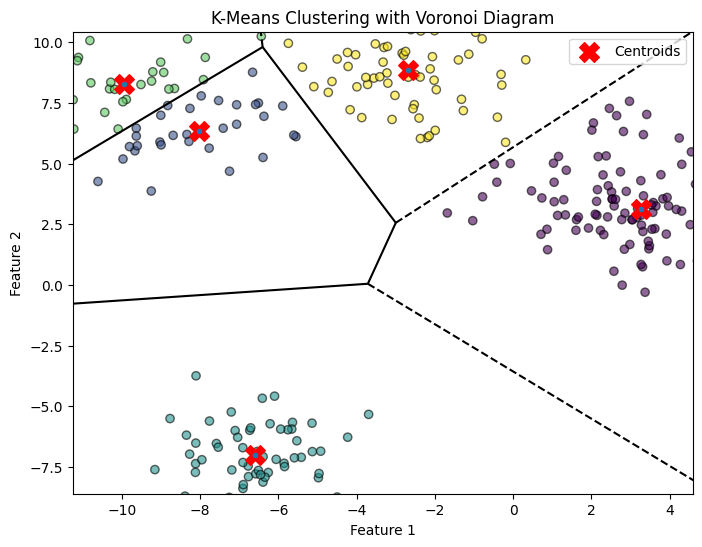

In [21]:
# Step 3: Create Figure & Axes
fig, ax = plt.subplots(figsize=(8, 6))

# Step 4: Plot Data Points
ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.6)
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

# Step 5: Voronoi Tessellation
vor = Voronoi(centers)
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=1.5)

# Step 6: Final Touches
ax.set_title("K-Means Clustering with Voronoi Diagram")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()
plt.show()

#### How does the K-means algorithm work?

    We neither know centroids or instance labels(location) at the starting point. Therefore, we (the algorithm) starts by placing centroids randomly (e.g by picking k instances at random from the dataset and using their locations as centroids). Then we label the instances, update the centroids and keep repeating until the centroids stop moving. The algorithm is guaranteed to converge in a finite number of steps. That's because the mean squared distance between the instances and their closest centroids can only go down at each step, and since it cannot be negative, it's guaranteed to converge. Kmeans directly minimizes inertia, the squared distances from points to the cluster.

K-means can be applied to any number of input variables, however the voronoi tesselation can only be visualised in 2d or 3d space. Therefore if we wish to visualise more complex clustering algorithms, we can use PCA(principal component analysis) to reduce features into 2d/3d space.

### Accelerated k-means/mini batch k-means

Improvement to the k-means algorithm proposed in 2003 paper by Charles Elkan. On some large datasets with many clusters, the algorithm can be accelerate by avoiding many unnecessary distance calculations.

This is achieved by exploiting the triangle inequality (a straight line is always the shortest distance between two points) and by keeping track of lower and upper bounds for distances between instances and centroids. However, the algorithm does not always accelerate training and it depends on the dataset. To use it, set algorithm = "elkan"

    MiniBatchKmeans on the other hand is another variant of the k-means algorithm that has enjoyed widespread use. Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorith, (typically by a factor of 3-4) and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the MiniBatchKmeans class, which is used the same way as the Kmeans class.

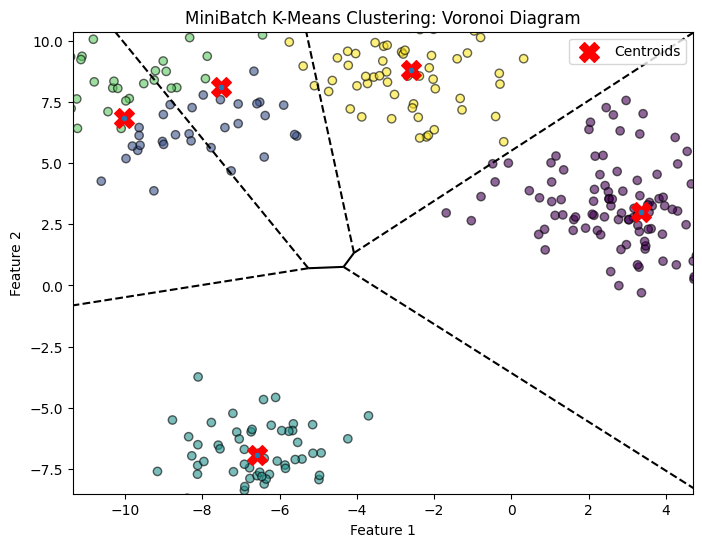

In [28]:
minibatch_kmeans = MiniBatchKMeans(n_clusters =5, random_state=42)
minibatch_kmeans.fit(X)

#setting centers to the new minibatch_kmeans centers
centers = minibatch_kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=(8, 6))

# Plot Data Points
ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.6)
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

# Voronoi Tessellation
vor = Voronoi(centers)
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=1.5)

# Final Touches
ax.set_title("MiniBatch K-Means Clustering: Voronoi Diagram")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()
plt.show()

### Finding the Optimal Number of clusters (All Kmeans types)

While in the example we could set the number of clusters (k) to 5 because it was obvious by looking at the scatterplot that was correct, in general it won't be so easy to know how to set k, and the result might be quite bad if you set it to the wrong value. 

    A precise approach is to use the silhouette score, which is the mean silhouette coefficient over all the instances. The coefficient varies between -1 and +1, where a score close to +1 means the instance is well inside its own cluster and far from others, while a coefficient close to 0 means it is close to a cluster boundary, and a cluster close to -1 means the instance may have been assigned to the wrong cluster. Again, the method takes the average(mean) of the socres and thus we choose the value of K where the silhouette score is the closest to 1.

In [31]:
#we first import the silhouette_score function from sklearn.metrics, for formatting all imports are at the top of the document

#This code calculates the silhouette score for a given clustering result
#in this case, it is using the labels from the first kmeans cluster
silhouette_score(X, kmeans.labels_)

np.float64(0.5866813869196217)

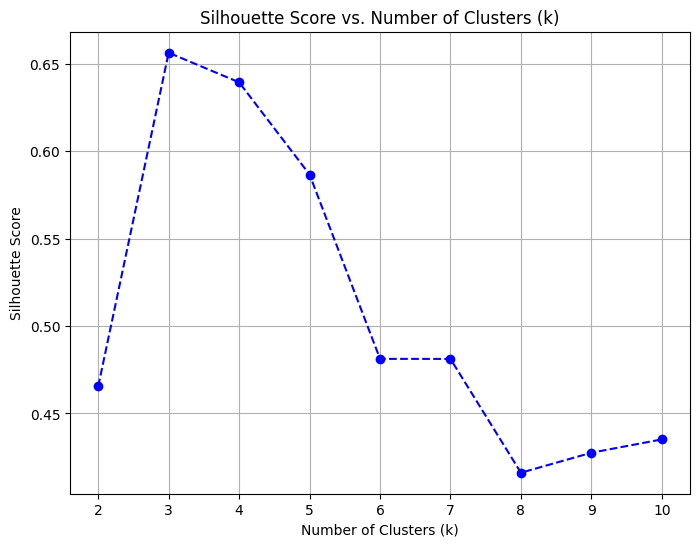

In [32]:
# Now we know the silhouette score for the kmeans algorithm with 5 clusters, but in order to decide what is the correct number of clusters we need to calculate
# the score for all values of k (within a reasonable range)

# Step 1: List of different values for k (number of clusters)
k_values = range(2, 11)  # Let's test k from 2 to 10

# Step 2: Calculate silhouette scores for each k
silhouette_scores = []

for k in k_values:
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Calculate the silhouette score for the current clustering
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Step 3: Plot Silhouette Scores for Different k Values
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='b', linestyle='--')
plt.title("Silhouette Score vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_values)  # Ensure each k value is shown on the x-axis
plt.show()

From the visualisation, we can see that the optimal number of clusters for the random dataset we created earlier is 3, which has a higher score than any other numbers of cluster k. (CONTINUE FROM 272 FOR MORE INFO ON KMEANS, FOR NOW MOVING ON)

### DBSCAN

The density-based spatial clustering of applications with noise (DBSCAN) algorithm define clusters as continuous regions of high density. 

    For each instance, the algorithm counts how many instances are located within a small distance (epsilon) from it. This region is called the instance's (epsilon)-neighbourhood. 

    If an instance has at least min_samples instances in its e-neighbourhood, it is considered a core instance. In other words, core instances are those that are located in dense regions.

    All instances in the neighbourhood of a core instance belong to the same cluster. This neighbourhood may include other core instances; therefore, a long sequence of neighbouring core instances forms a single cluster

    Any instance that is not a core instance and does not have one in its neighbourhood is considered an anomaly

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

#labels of all the instaces are now available in the labels_ instance variable
#Each data point in the dataset gets assigned a label, which is essentially the cluster index or identifier
#for the group (or cluster) it belongs to
#The labels are a list of numbers where each corresponds to a different cluster ie 0,1,2. 
#Points assigned to -1 are outliers/noise

dbscan.labels_

labels = dbscan.labels_

#Notice some instances have  a cluster index of -1, which means that they are considered as anomalies by the algorithm. The indices of the core instances are
#available in the core_sample_indices_ instance variable, and the core instances themselves are available in the componenets_instance vairbale

dbscan.core_sample_indices_

dbscan.components_

DBSCAN(eps=0.05)

array([ 0,  1,  2,  3,  0,  0,  0,  0,  0,  0,  0,  4,  0,  3,  2,  3,  0,
        3,  0,  0,  0,  3,  3,  2, -1,  3,  0, -1,  3,  0,  0,  2,  4, -1,
        5,  0,  3,  0,  0,  0,  0,  2,  0, -1,  0,  2,  0,  0,  2,  3,  6,
        5,  0,  3,  3,  0,  3,  4,  0,  0,  3,  3,  1,  3,  0,  1,  3,  0,
        3, -1,  0,  3,  3,  2, -1,  0,  0,  0,  3,  2,  3,  4,  4,  4,  2,
        3,  0,  0,  3, -1,  0,  3,  2,  0,  0,  0,  3,  5,  0,  2,  0,  2,
        3,  0, -1,  0, -1,  3,  5,  5,  3,  0,  3,  0,  0,  0,  5,  0,  3,
        1,  0,  0,  3,  4,  0,  3,  3,  2,  6,  3,  3, -1,  3,  5,  0,  5,
        5,  0,  4,  6,  0,  5,  3,  2,  3,  0,  3,  3,  6,  3,  0,  3,  0,
        3,  3,  0,  0,  2,  0, -1,  5,  3,  5,  0,  5,  0,  0,  0,  3,  0,
        3,  0,  5,  0,  0,  5,  5,  0,  3,  2,  3,  3,  6,  0,  0,  3,  3,
        0,  2,  3,  5,  5,  0,  3,  0,  5,  3,  0,  0,  3,  0,  0,  0,  2,
        4,  0,  0,  3,  0,  0,  2,  0,  2,  3,  3, -1,  5,  0,  1,  3,  3,
        5,  3,  5,  0,  0

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  25,  26,  28,  29,  30,
        32,  34,  35,  36,  37,  38,  39,  42,  44,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  56,  57,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  76,  77,  78,  80,  82,  83,
        84,  85,  86,  88,  90,  91,  92,  93,  94,  96,  97, 100, 101,
       102, 103, 105, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 125, 126, 127, 129, 130, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162,
       163, 164, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177,
       178, 179, 180, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       196, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 216, 217, 218, 220, 222, 224, 225, 22

array([[ 1.68555003, -0.15412891],
       [ 0.98031455,  0.23651003],
       [-0.01051008,  0.26663601],
       ...,
       [-1.04588911,  0.18136827],
       [-0.18494608,  0.99275267],
       [ 0.67282326,  0.70399828]], shape=(793, 2))

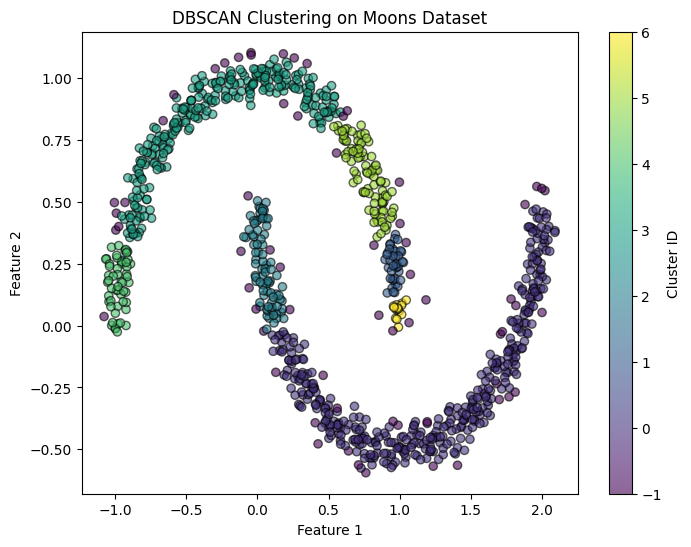

In [41]:
#Plotting our results

plt.figure(figsize=(8,6))

#color the points by their cluster label (-1 label is noise)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap = 'viridis', marker = 'o', edgecolors = 'k', alpha=0.6)

#Title and labels
plt.title('DBSCAN Clustering on Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label = 'Cluster ID')

plt.show();



This DBSCAN model identified a lot of anomalies (purple dots) and many different groups. To change this, we may want to consider increasing eps from 0.05. The code below does this.

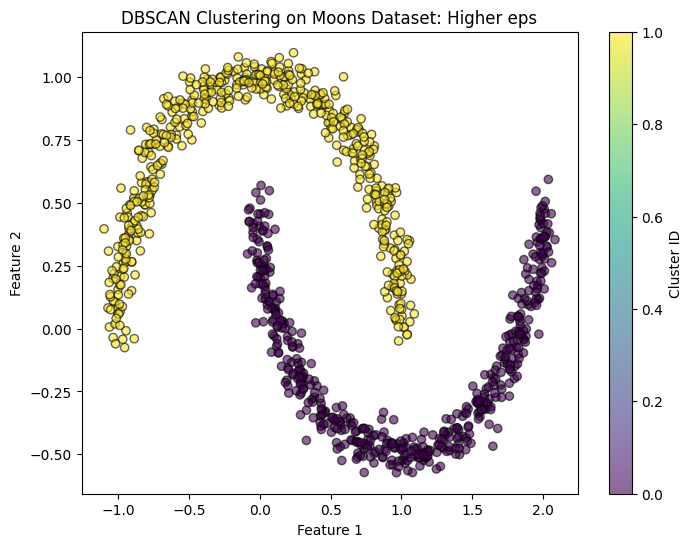

In [45]:
X, y = make_moons(n_samples = 1000, noise=0.05)
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

#labels of all the instaces are now available in the labels_ instance variable
#Each data point in the dataset gets assigned a label, which is essentially the cluster index or identifier
#for the group (or cluster) it belongs to
#The labels are a list of numbers where each corresponds to a different cluster ie 0,1,2. 
#Points assigned to -1 are outliers/noise

dbscan2.labels_

labels2 = dbscan2.labels_

#Plotting our results

plt.figure(figsize=(8,6))

#color the points by their cluster label (-1 label is noise)

plt.scatter(X[:, 0], X[:, 1], c=labels2, cmap = 'viridis', marker = 'o', edgecolors = 'k', alpha=0.6)

#Title and labels
plt.title('DBSCAN Clustering on Moons Dataset: Higher eps')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label = 'Cluster ID')

plt.show();


#### Summary of DBSCAN

    Simple/Powerful algorithm capable of identifying any number of clusters of any shape. Robust to outliers, and has just two hyperparameters (eps and min_samples). 

    eps or epsilon defines the maximum distance between two points for them to be considered neighbors and aprt of the same cluster. Clusters may become smaller/more sparse with small eps and vice versa

    min_samples specifies how many neighbouring points are needed to classify a point as a core point. If a point has enough neighbouring points, (at least min_samples within the eps) it becomes a core point, which can form a cluster.
    
    If the density varies significantly across the clusters or there's no sufficiently low density region around clusters, DBSCAN can struggle to capture all the clusters properly. Moreoever, its computational complexity does not scale well to large datasets.

## Gaussian Mixture Models (GMM) 

Probabilistic model that assumes that the instances were generated from a mixture of several Gaussian (Normal)distributions whose parameters are unknown. The model tries to find the parameters (mean, variance) of these Gaussian distributions and the probability that each data point belongs to each distribution. TLDR, each cluster it identifies will be one normal distribution.

Key Features:

    Soft clustering: Unlike algorithms like K-means, which assigns each data point to a single cluster (hard clustering), GMM assigns a probability to each data point for belonging to each cluster. This means each data point can belong to multiple clusters with varying degrees of confidence. 

    Gaussian Distribution: Each cluster in a GMM is modeled by a Gaussian distribution (bell curve) characterized by a mean (center of cluster) and variance (spreaad of the cluster)

When to Use GMM:
    You believe/know that the data points are generated from multiple Gaussian distributions

    You want a probabilistic approach, likelihood a point belongs to a cluster instead of a hard assignment

    Your clusters are not neccesarily spherical but instead could be elliptical/have different densities.

In [50]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init=10)
gm.fit(X)

gm.weights_ #gives array containing the weights of each gaussian component (cluster) in the mixture model
#weight represents the proportion of the dataset that belongs to each Gaussian cluster. It is a value between 0 and 1,
#and the sum of all weights should equal 1

gm.means_ #array contains the mean vectors (centroids) for each Gaussian component. 
#Mean is the center of each Gaussian cluster, representing the expected value of the data points in that cluster.
#Since GMM models multi-dimensional data, the mean is a vector with the same number of dimensions as the data.
#Given we have 3 clusters and 2D data, the mean vector each cluster is a 2D vector ie. mean of x1, x2

gm.covariances_ #covariance matrix of each cluster, shape of (k,d,d) where d is number of features in data
#as we have 3 clusters, output takes the shape of (3,2,2) 
#which contains 9 values in total (3 clusters * 2 dimensions * 2 dimensions)

GaussianMixture(n_components=3, n_init=10)

array([0.1872713, 0.1975204, 0.6152083])

array([[-0.7832308 ,  0.53254124],
       [ 1.752327  , -0.04172615],
       [ 0.48475979,  0.25990472]])

array([[[ 0.03926587,  0.05177976],
        [ 0.05177976,  0.08649362]],

       [[ 0.04639982,  0.05746014],
        [ 0.05746014,  0.08362728]],

       [[ 0.19005251, -0.12005793],
        [-0.12005793,  0.29489885]]])

### How do Gaussian Models work?

GMM classification relies on the expectation maximization (EM) algorithm, which has many similarities with the k-means algorithm: it also initializes the cluster parameters randomyl, then it repeats two steps until convergence, first assigning instances to clusters (called the expectation step) and then updating the clusters (called the maximization step). You can think of EM as a generalization of k-means that not only finds the cluster centers but also their size, shape, and orientation. 

In [51]:
#We can then check whether or not the algorithm converged and how many iterations it took to converge

gm.converged_

gm.n_iter_

#Given we fitted this to the dataset created for the DBSCAN model it doesn't work very well, many iterations more
#than you would espect with data that formed k gaussian distributions.

#CONTINUE FROM PAGE 286

True

19

### Selecting the Number of Clusters when using GMM

Unlike k-means, we cannot use the inertia or silhouette score to select the appropriate number of clusters because they are not reliable when the clusters are not spherical or have different sizes. 

Instead, we try to find the model which minimizes a theoretical information criterion such as the bayesian information criterior (BIC) or the Akaike information criterion (AIC).

Both BIC and AIC penalize models that have more parameters to learn (e.g more clusters) and reward models that fit the data week. They often will select the same model, but when they differ the model selected by BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends not to fit the data quite as well.

In [52]:
# To compute the BIC and AIC, call the bic() and aic() methods

gm.bic(X)
gm.aic(X)

#This code gives us the AIC and BIC when the number of clusters is set to 3, given that is the model we 
#assigned to gm in the previous step.

#To use BIC/AIC to decide what model is best, we could plot the AIC/BIC for different numbers of clusters k 
#on the same dataset, and as opposed to the silhouette score we chose the k where our IC is at a minimum.

np.float64(2749.62637274902)

np.float64(2666.1945330063236)